In [75]:
#APPLYING EDA ON  DATASET 01 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing dataframe
"""
we have a dataset of ipl auction and we have to perform exploratory data analysis like removing missing values , visualizing data by scatter and bar plot
, outliner detection by boxplot and hist graphs and then removal using IQR or z-score method.Performing univariate and bivariate along with correlation 
to check whether there any relaion exist and atlst getting a cleaned data along with insight that will be used for training model in future.
"""
df = pd.read_csv("iplauction2023_ds1.csv")
df.head() #Printing dew entries to make sure that dataset is loaded sucessfully

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [3]:
# Understanding Data like what type of data we have
df.shape #Prints no. of rows and col > so we have 309 rows and 7 columns in this dataset

(309, 7)

In [4]:
df.info() # X-ray of data >>> it provides columns , Non null count and datatype of respective column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


In [5]:
df.columns #Prints columns names >>> so we have columns like name , player style , nationality etc

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

In [6]:
df.describe() # Shows quick numerical data like mean , std, min ,max etc etc.
#Just for numerical columns

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


In [7]:
df.describe(include='all') # Prints quick numerical data for all types of data types

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
count,309,309,309,151.000000,238.000000,238,309
unique,309,4,14,NaN,NaN,10,3
top,Axar Patel,Bowler,India,NaN,NaN,RR,RETAINED
freq,1,111,201,NaN,NaN,25,158
mean,NaN,NaN,NaN,59.205298,368.067227,NaN,NaN
std,NaN,NaN,NaN,59.688337,449.070117,NaN,NaN
min,NaN,NaN,NaN,20.000000,20.000000,NaN,NaN
25%,NaN,NaN,NaN,20.000000,21.250000,NaN,NaN
50%,NaN,NaN,NaN,20.000000,150.000000,NaN,NaN
75%,NaN,NaN,NaN,75.000000,625.000000,NaN,NaN


In [8]:
# Checking any missing values

df.isnull().sum()
# so we have 158 missing values in base price columns
# 71 missing values in final price and 71 in franchise


name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

<Axes: >

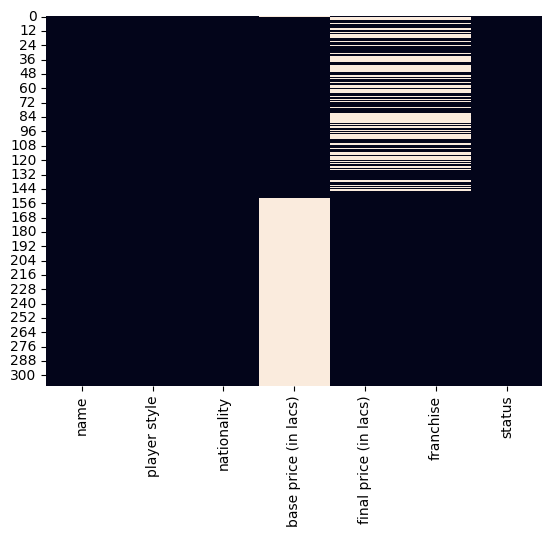

In [9]:
#visualizing missing values using heatmap
sns.heatmap(df.isnull(), cbar=False)
#It show at which index we have missing values

In [76]:
#Making column names a bit more precise and readable
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns # now we have more precise columns names

Index(['name', 'player_style', 'nationality', 'base_price_(in_lacs)',
       'final_price_(in_lacs)', 'franchise', 'status'],
      dtype='object')

np.float64(1.4035924943988667)

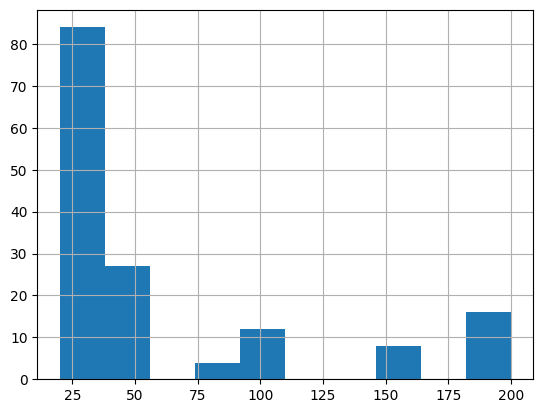

In [11]:
#Dealing with missing values

# Before doing anything let me check wether our data is skewed or not so i have to fill it according to that
#i.e. if not skewed > use mean() , if skewed > use median() , if categorical > use mode()

"""
If skewness is between -0.5 and 0.5 → Fairly symmetric, So we Use mean
&
If skewness is > 0.5 or < -0.5 → Skewed , So we  Use median


"""

# for 'base_price_(in_lacs)' column

df['base_price_(in_lacs)'].skew() # skewness value = 1.475 indicates there is skewness >>> use Median
df['base_price_(in_lacs)'].hist() #Visualizing data >>> pretty right skewed

df['final_price_(in_lacs)'].skew() #skewness value = 1.403 indicates there is skewness >>> use Median

# And columns like franchise which is of categorical type i will use Mode to fill em up for missing ones.

In [12]:
 # Just making a copy of data to make sure there a backup till now

df2 = df.copy()

In [66]:
# Filling missing values

df['base_price_(in_lacs)']=df['base_price_(in_lacs)'].fillna(df['base_price_(in_lacs)'].median())
df['final_price_(in_lacs)']= df['final_price_(in_lacs)'].fillna(0)
df['franchise']=df['franchise'].fillna("No_Fra") # Here [0] is grabbing the first value from  mode returned series.

In [74]:
df.head()

,name,player_style,nationality,base_price_(in_lacs),final_price_(in_lacs),franchise,status
0,Harshit Rana,Bowler,India,20.0,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,0.0,CSK,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,0.0,CSK,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [67]:
#Cross checking whether all missing values ae resolved
df.head()
df.isnull().sum()
# Yeah! we sucessfully get rid of missing values

name                     0
player_style             0
nationality              0
base_price_(in_lacs)     0
final_price_(in_lacs)    0
franchise                0
status                   0
dtype: int64

In [68]:
# Checking duplicated values

df.duplicated().sum()

# we have no duplicated values

np.int64(0)

AttributeError: 'Series' object has no attribute 'boxplot'

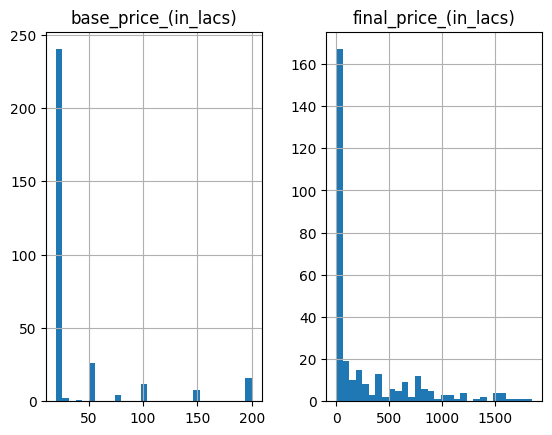

In [69]:
# Understanding each columns >>> Univariate analysis

df.hist(bins=30) # Bin 30 shows that total data is divided in to 30 equal parts for better visuality
#sns.boxplot(x=df['base_price_(in_lacs)']) # For numerical columns
df['base_price_(in_lacs)'].boxplot()


'\nInsight no.01: Most of player has base price less than equal to 20lacs and very few have higher base price resulting in right skewed data\nInsight no.02 :Most of player has final price less than equal to 200lacs and very few have higher final price resulting in right skewed data\n'

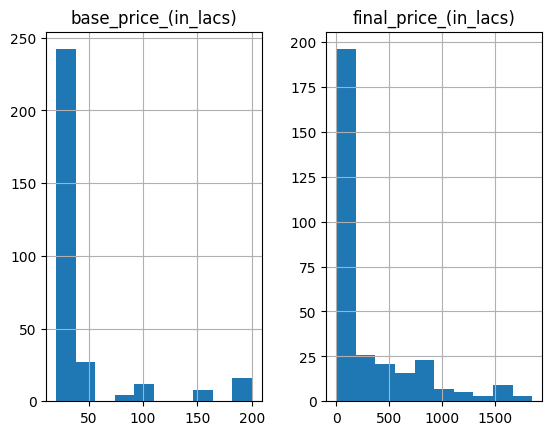

In [70]:
df.hist()
#It shows that our data is right skewed
"""
Insight no.01: Most of player has base price less than equal to 20lacs and very few have higher base price resulting in right skewed data
Insight no.02 :Most of player has final price less than equal to 200lacs and very few have higher final price resulting in right skewed data
"""

14

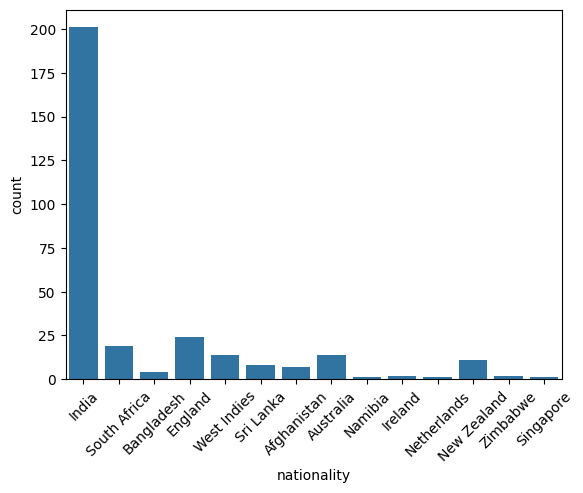

In [71]:
#For categorical columns/data
sns.countplot(x=df.nationality, data=df)
plt.xticks(rotation=45)
plt.show

"""
If we talk about nationality franchises focuses on buying indian player at 1st priority , then england and SA players and least player are from 
Nambia,Netherlandand Singapore.

There are total 14 different nationality players participated in auction
"""
df.nationality.value_counts() # for count of player of each naionality
df.nationality.nunique() # For counting no. of nationalities participated


In [72]:
df.columns

Index(['name', 'player_style', 'nationality', 'base_price_(in_lacs)',
       'final_price_(in_lacs)', 'franchise', 'status'],
      dtype='object')

'\n1. We have alot of bowlers participating in this auction \n2. Wicket Keeper batsman are lowest in number\n'

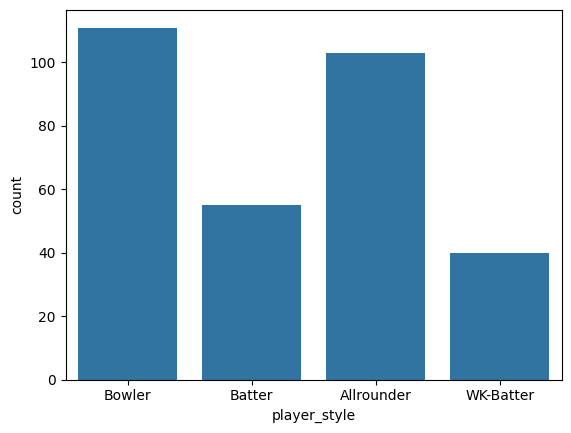

In [73]:
# Visualizing **player_style** column

sns.countplot(x=df.player_style ,data=df)
df.player_style.nunique()
df.player_style.value_counts()
"""
1. We have alot of bowlers participating in this auction 
2. Wicket Keeper batsman are lowest in number
"""

'\n1. It indicate that almost all franchises have same no. of player but  csk bought almost 3times more than every other franchise\n'

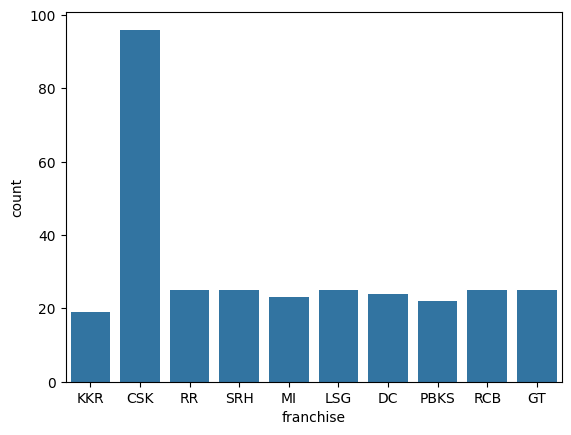

In [21]:
sns.countplot(x=df.franchise )
"""
1. It indicate that almost all franchises have same no. of player but  csk bought almost 3times more than every other franchise
"""

'\nThis shows that Almost more than 150 player are retained by their franchises and very d\n'

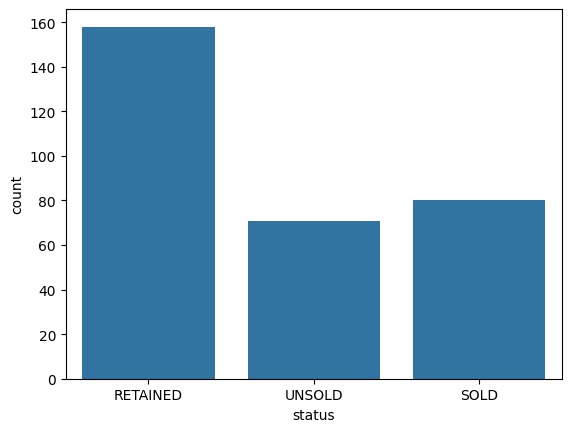

In [22]:
sns.countplot(x=df.status)
"""
This shows that Almost more than 150 player are retained by their franchises 
"""

#Here my univariate analysis is completed and imp insights are mentioned along with respective column along with their visuals

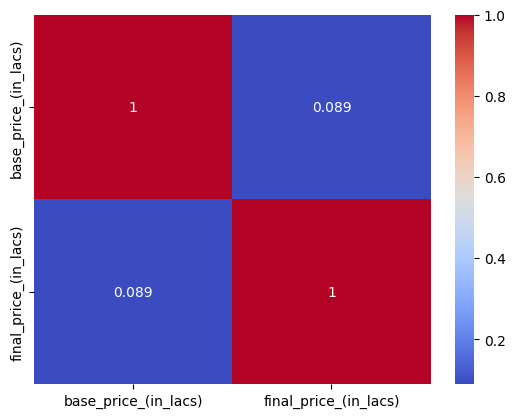

'\nIt clearly indicate that there is no relation between both numerical col i.e. base price and final price\n'

In [23]:
# Bivariate analysis >>> Checking relationship between various columns

# For numerical columns

corr_numerical = df['base_price_(in_lacs)'].corr(df['final_price_(in_lacs)'])
corr_numerical  # equal to 0.089 indicates there is almost no relation between numerical data

#Visualization thriugh heatmap for better understanding
corr_data = df[['base_price_(in_lacs)', 'final_price_(in_lacs)']].corr()

sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.show()


"""
It clearly indicate that there is no relation between both numerical col i.e. base price and final price
"""

In [24]:
df.groupby('franchise')['base_price_(in_lacs)'].describe()

,count,mean,std,min,25%,50%,75%,max
franchise,,,,,,,,
CSK,96.0,49.375000,54.609860,20.0,20.0,20.0,50.0,200.0
DC,24.0,39.583333,52.293417,20.0,20.0,20.0,20.0,200.0
GT,25.0,31.600000,36.592349,20.0,20.0,20.0,20.0,200.0
KKR,19.0,34.210526,34.369849,20.0,20.0,20.0,20.0,150.0
LSG,25.0,34.200000,37.629775,20.0,20.0,20.0,20.0,200.0
MI,23.0,34.782609,45.314012,20.0,20.0,20.0,20.0,200.0
PBKS,22.0,29.545455,38.603882,20.0,20.0,20.0,20.0,200.0
RCB,25.0,27.400000,27.805875,20.0,20.0,20.0,20.0,150.0
RR,25.0,36.000000,45.368859,20.0,20.0,20.0,20.0,200.0


<Axes: xlabel='franchise', ylabel='base_price_(in_lacs)'>

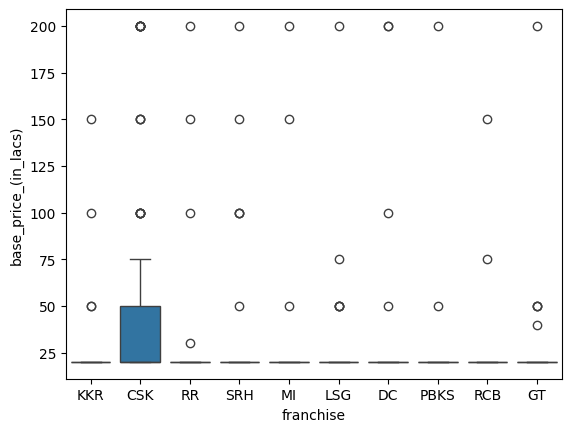

In [25]:
# bivariate analysis between numeric and categoric column

sns.boxplot(x='franchise', y='base_price_(in_lacs)', data=df)
"""
There exist a relation between only one column with base price. i.e. csk and base_price which indicates that csk is spending higher on base price  as compared to other franchises

Rest of columns show no relation.
"""

<Axes: xlabel='franchise', ylabel='final_price_(in_lacs)'>

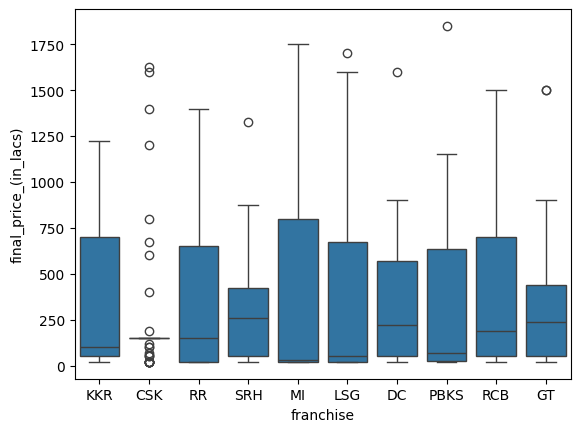

In [29]:
# Bivariate analysis between numeric and categoric column.i.e. franchise and final_price_in_lacs
sns.boxplot(x='franchise', y='final_price_(in_lacs)', data=df)

"""
There exist a relation between almost all column.i.e. csk and final_price which indicates that mi is spending higher on base price  as compared to other franchises

and Only one column.i.e. Csk has almost  no relation with final price 
"""

In [28]:
#Showing Spending of franchises as base price 
df.groupby('franchise')['base_price_(in_lacs)'].mean().sort_values(ascending=False)
#Csk is spending more on base price as compared to other franchises

franchise
CSK     49.375000
SRH     43.200000
DC      39.583333
RR      36.000000
MI      34.782609
KKR     34.210526
LSG     34.200000
GT      31.600000
PBKS    29.545455
RCB     27.400000
Name: base_price_(in_lacs), dtype: float64

In [26]:
# Showing spending of relative franchises as final prices

df.groupby('franchise')['final_price_(in_lacs)'].mean().sort_values(ascending=False)
"""
   MI has highest spending than all other franchises
"""

franchise
MI      409.565217
PBKS    376.363636
RCB     373.000000
RR      366.600000
LSG     362.600000
GT      362.200000
DC      361.875000
SRH     353.800000
KKR     337.368421
CSK     208.333333
Name: final_price_(in_lacs), dtype: float64

<Axes: xlabel='status', ylabel='base_price_(in_lacs)'>

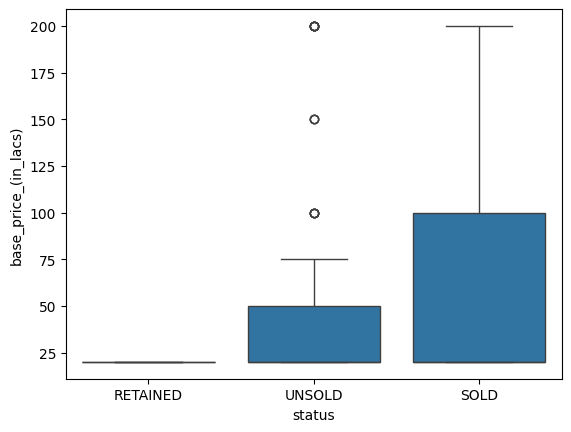

In [27]:
#Bivariate analysis between Numerical and Categorical columns.i.e. status and base price
sns.boxplot(x='status', y='base_price_(in_lacs)', data=df)

"""
There exist a relationship between base price and status of player. 
1.Almost a large number of player are sold between 0 to 100 lacs range
2. There are few players that got a really high base price but still remain unsold
3. almost no relation between retained player and their base price
"""

<Axes: xlabel='status', ylabel='final_price_(in_lacs)'>

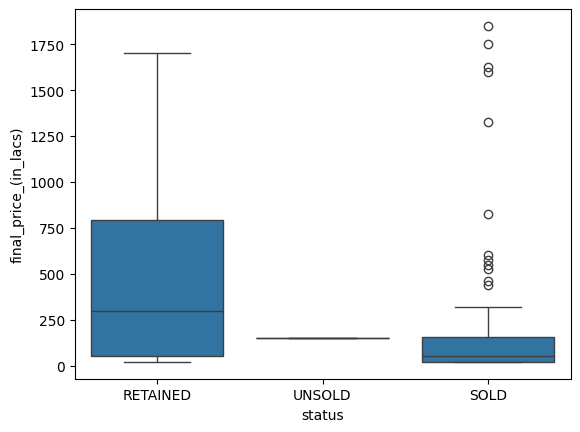

In [31]:
#Bivariate analysis between Numerical and Categorical columns.i.e. status and final price
sns.boxplot(x='status', y='final_price_(in_lacs)', data=df)



"""
There exist a relationship between base price and status of player. 
1.Almost a large number of player are retained between 0 to 750 lacs range > indicates a strong relationship
2. There are few players sold for very high final price
3. almost no relation between unsold player and final price
"""


In [ ]:
df.columns

<Axes: xlabel='player_style', ylabel='base_price_(in_lacs)'>

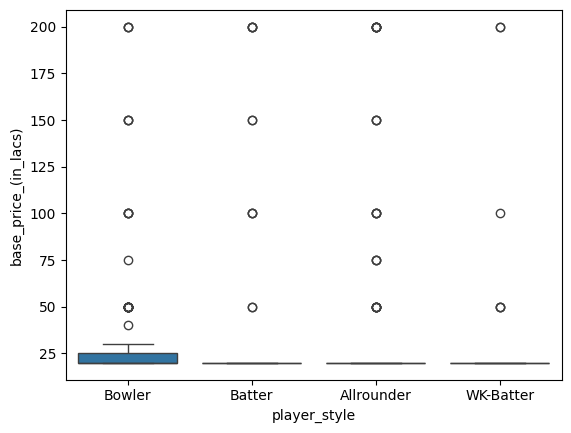

In [32]:
#Bivariate analysis between numerical and categorical column.i.e. base price and player style
sns.boxplot(x='player_style', y='base_price_(in_lacs)', data=df)
"""
Very weak or almost no relationship
"""

<Axes: xlabel='name', ylabel='base_price_(in_lacs)'>

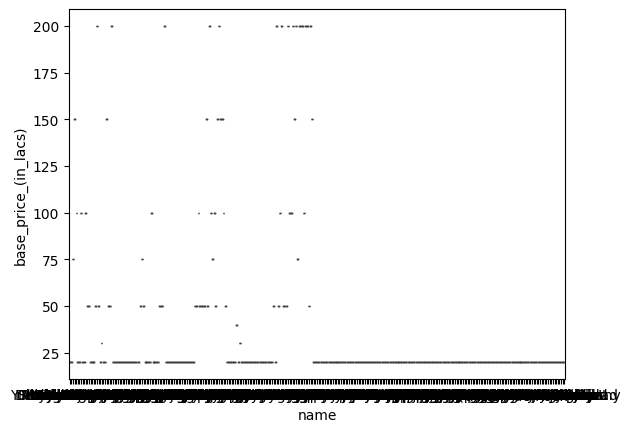

In [36]:
#Bivariate analysis between numerical and categorical column.i.e. base price and name
sns.boxplot(x='name', y='base_price_(in_lacs)', data=df)

"""
No relation exist

"""



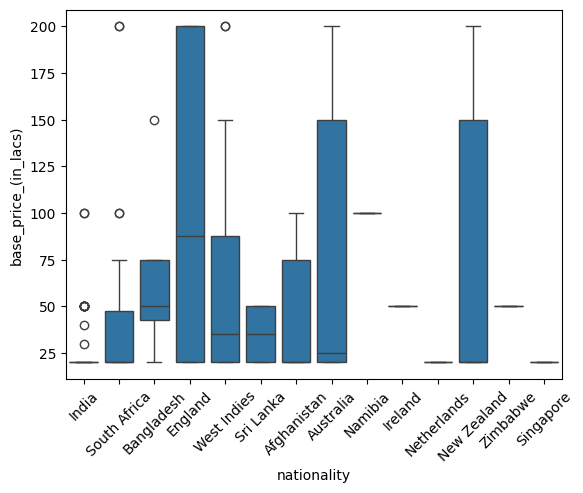

In [37]:
#Bivariate analysis between numerical and categorical column.i.e. base price and nationality
sns.boxplot(x='nationality', y='base_price_(in_lacs)', data=df)
plt.xticks(rotation=45)
plt.show()

"""
Exist a relationship between many nationalties and their base prices except few
1.Their are few outliner in india and a=some other nationalities indicates that some lucky players got unusual higher base price.

"""

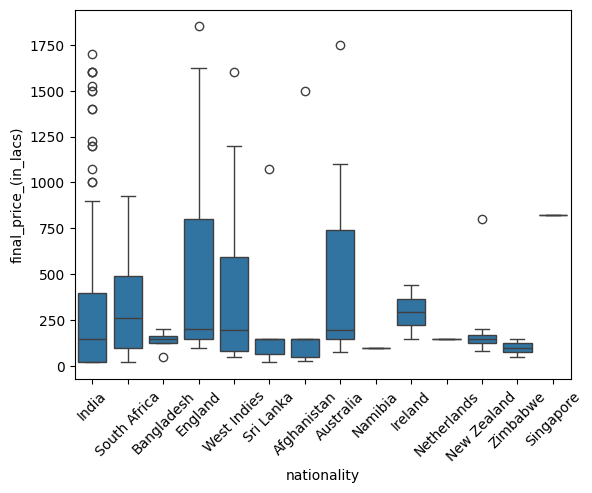

In [38]:
sns.boxplot(x='nationality', y='final_price_(in_lacs)', data=df)
plt.xticks(rotation=45)
plt.show()

"""
The boxplot reveals that Indian players exhibit a broader distribution of final prices, with several outliers indicating exceptionally high auction values. 
This suggests that, compared to players from other nationalities, Indian players were more frequently associated with premium bids.
"""

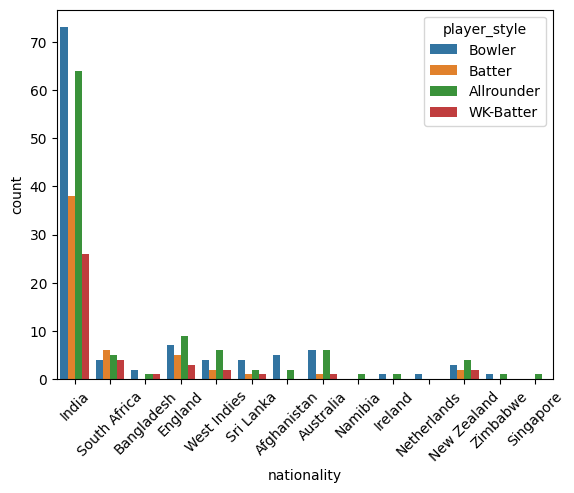

ValueError: could not convert string to float: 'India'

In [41]:
#bivariate analysis between categorical columns
sns.countplot(x='nationality', hue='player_style', data=df)
plt.xticks(rotation=45)
plt.show()

"""
There exist a very weak relation between player style and nationality as only Indian are picked mostly in all aspects of player styles
"""

In [42]:
df.columns

Index(['name', 'player_style', 'nationality', 'base_price_(in_lacs)',
       'final_price_(in_lacs)', 'franchise', 'status'],
      dtype='object')

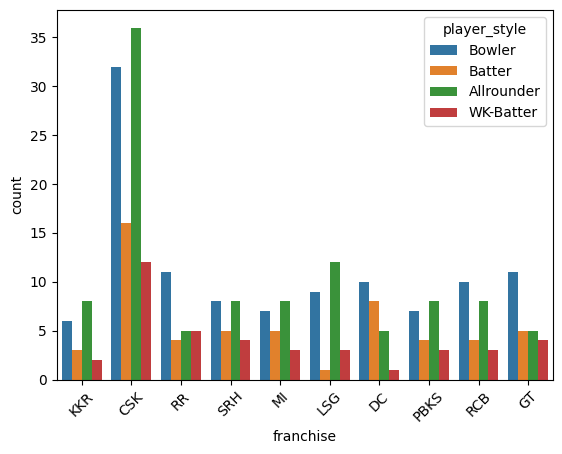

In [43]:
#bivariate analysis between categorical columns
sns.countplot(x='franchise', hue='player_style', data=df)
plt.xticks(rotation=45)
plt.show()

"""
There exist a relationship
1.Csk is the only franchise who picked almost large number of bowler and alrounder
2.Other franchises almost focused on getting balanced team w.r.t player style
3.Alrounder category is most likely to be pcked of all franchises

"""

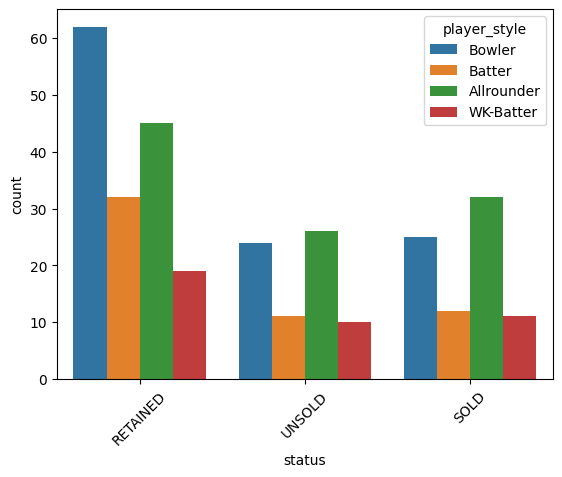

In [44]:
#bivariate analysis between categorical columns
sns.countplot(x='status', hue='player_style', data=df)
plt.xticks(rotation=45)
plt.show()

"""
Exist a quite strong relationship
1. Retained player are highest in all playing style 
2. Sold and unsold status got almost equal number player_style
"""

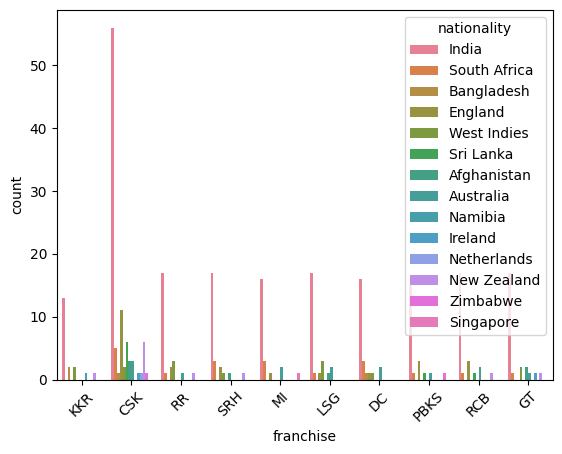

In [49]:
#bivariate analysis between categorical columns
sns.countplot(x='franchise', hue='nationality', data=df)
plt.xticks(rotation=45)
plt.show()

"""
There is weak relationship 
1.Indian player are dominated and likely to picked by all franchises 

"""

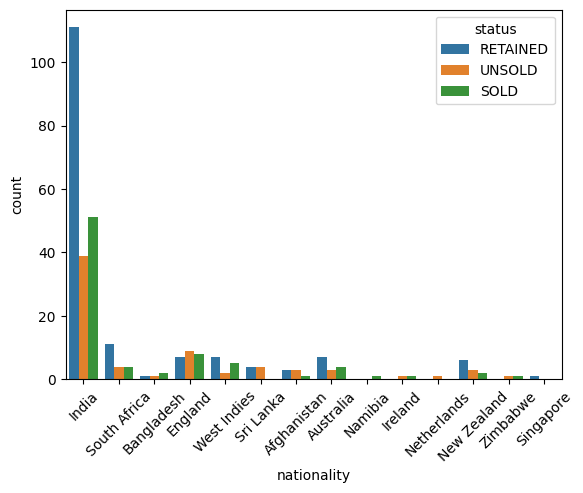

In [47]:
#bivariate analysis between categorical columns
sns.countplot(x='nationality', hue='status', data=df)
plt.xticks(rotation=45)
plt.show()


"""
There exist a weak relationship
As data seemed quite skewed because indian player are dominated in all three status and all others countries has negligible players participation as 
compared to indian players.
"""

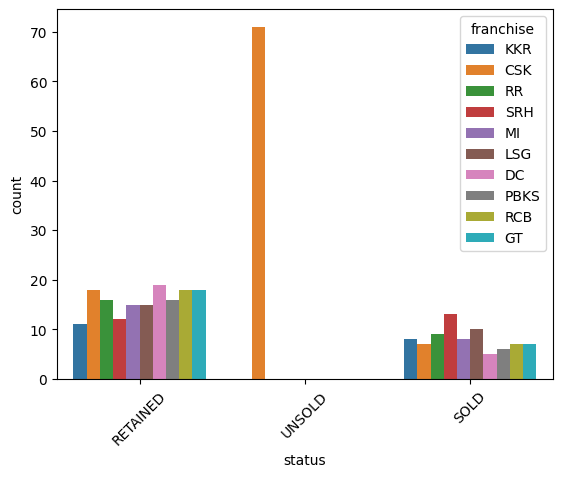

In [51]:
#bivariate analysis between categorical columns
sns.countplot(x='status', hue='franchise', data=df)
plt.xticks(rotation=45)
plt.show()


"""
Almost there is a equal picking of participation of all franchises in picking and not picking of player
Csk is the only franchise who has most unsold players 

"""

In [52]:
#Just making a copy of data for backup
df2 =df.copy()

Original shape: (309, 7)
Cleaned shape: (289, 7)


In [58]:
import numpy as np
#Removing outliner using z-score because our data is almost normally distributed. otherwise we go for IQR method if data was skewed

# Select numeric columns
num_df = df.select_dtypes(include=[np.number])

# Z-score function
def get_z_score_series(series):
    return (series - series.mean()) / series.std()

# Apply z-score
z_scores_df = num_df.apply(get_z_score_series)

# Create mask
mask = (z_scores_df.abs() < 3).all(axis=1)

# Split clean and outlier data
df_clean = df[mask]
df_outliers = df[~mask]

# Print shapes
print("Original shape:", df.shape)
print("Cleaned shape :", df_clean.shape)
print("Outliers shape:", df_outliers.shape)

# View some outliers
df_outliers.head(20)


Original shape: (309, 7)
Cleaned shape : (289, 7)
Outliers shape: (20, 7)


,name,player_style,nationality,base_price_(in_lacs),final_price_(in_lacs),franchise,status
17,Rassie van der Dussen,Batter,South Africa,200.0,150.0,CSK,UNSOLD
26,Rilee Rossouw,Batter,South Africa,200.0,460.0,DC,SOLD
59,Jamie Overton,Allrounder,England,200.0,150.0,CSK,UNSOLD
87,James Neesham,Allrounder,New Zealand,200.0,150.0,CSK,UNSOLD
93,Travis Head,Allrounder,Australia,200.0,150.0,CSK,UNSOLD
129,Kane Williamson,Batter,New Zealand,200.0,200.0,GT,SOLD
132,Jason Holder,Allrounder,West Indies,200.0,575.0,RR,SOLD
136,Nicholas Pooran,WK-Batter,West Indies,200.0,1600.0,LSG,SOLD
139,Adil Rashid,Bowler,England,200.0,200.0,SRH,SOLD
141,Adam Milne,Bowler,New Zealand,200.0,150.0,CSK,UNSOLD


In [60]:
#Applying log func to make data more normally distributed

# Step 1: Grab only numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Step 2: Apply log1p to each numeric column (log(x + 1))
df_log = df.copy()
df_log[num_cols] = df[num_cols].apply(lambda x: np.log1p(x))

# df_log now has log-transformed numeric features


array([[<Axes: title={'center': 'base_price_(in_lacs)'}>,
        <Axes: title={'center': 'final_price_(in_lacs)'}>]], dtype=object)

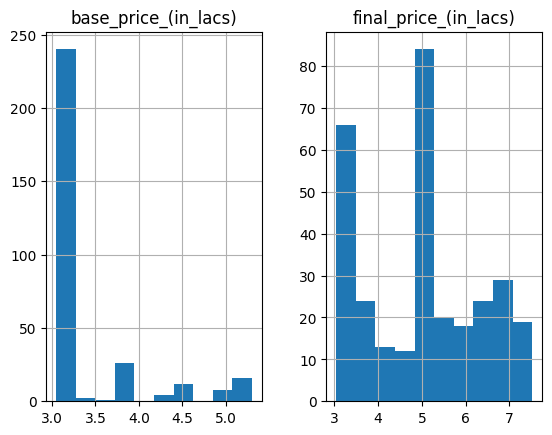

In [62]:
df_log.hist()

#Now data seems a little bit normally distributed


In [63]:
#Saving data as cleaned dataset so it can be used in future for training models

df_log.to_csv("Cleaned_ipl_auction.csv" , index=False)